<a href="https://colab.research.google.com/github/Satya9-9/Python_machine_learning/blob/main/assingment_fallon_studio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# impporting the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# reading the dataset
df = pd.read_csv("/content/drive/MyDrive/amazon food reviews/Reviews.csv")
print(df.shape)
df = df.head(500)
print(df.shape)


(568454, 10)
(500, 10)


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

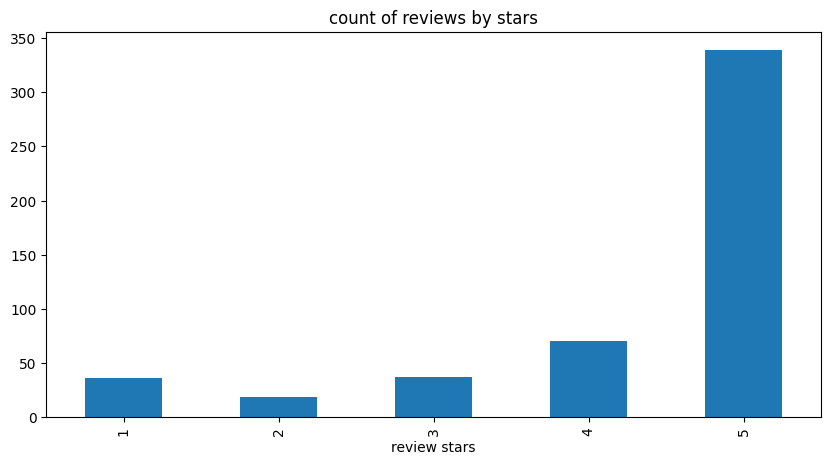

In [4]:
# df['Text'].iloc[0]
# in this we have make the barplot using score column
ax = df["Score"].value_counts().sort_index()\
.plot(kind="bar",
      title="count of reviews by stars",
      figsize=(10,5))

ax.set_xlabel("review stars")
plt.show()

In [5]:
example = df['Text'][50]

In [6]:
# nltk has inbuilt method to tokenize the words
tokens = nltk.word_tokenize(example)
tokens[0:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [7]:
nltk.download('averaged_perceptron_tagger_eng')
# tagging the words optional
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [8]:
# here we are removing the stopwords
stpwrds = stopwords.words('english')
cleaned_example = [word for word in tokens if word not in stpwrds]
print(cleaned_example)

['This', 'oatmeal', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', "n't", 'like', '.', 'Quaker', 'Oats', 'way', 'go', '.']


In [9]:
#using nltk library we are using the inbuilt sentiments classifier
# that is vader

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [10]:
# this will calculate the polarity of the sentecne
# if sentence is negative or positive or neutral
sia.polarity_scores("I am so Happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [11]:
sia.polarity_scores("this is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [12]:
# running the polarity score on the entire dataset
res = {}
for index,row in tqdm.tqdm(df.iterrows(), total =len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

print(res)

100%|██████████| 500/500 [00:00<00:00, 1512.58it/s]

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}, 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}, 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}, 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}, 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}, 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}, 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}, 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}, 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}, 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}, 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579}, 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296}, 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}, 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}, 16: {'neg': 0.0

In [13]:
# converting the dictionary to the Dataframe for better visiblity
vaders = pd.DataFrame(res).T
# here we are changing the column name index to  id
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
# here we merge the exisitng dataframe with our vaders dataframe
vaders = vaders.merge(df,how ='left')

In [14]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


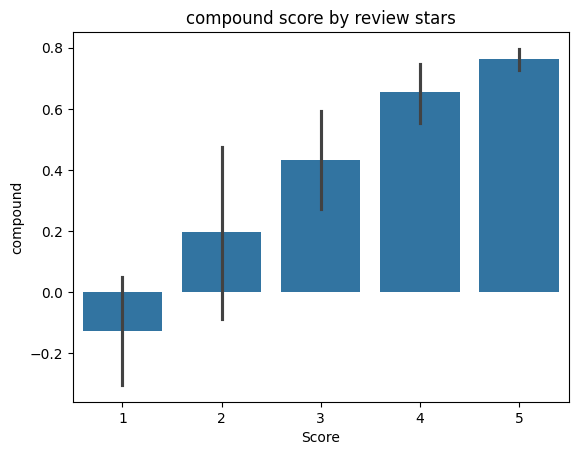

In [15]:
# plotting vaders compound result with the score to observe if our model is running fine

ax = sns.barplot(data= vaders, x ='Score',y='compound')
ax.set_title('compound score by review stars')
plt.show()

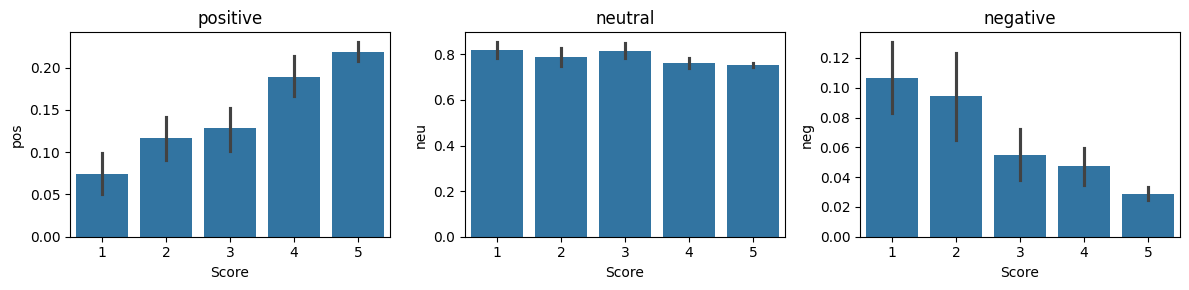

In [16]:
# visualizing the our sentiments with the score
fig,axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data= vaders, x ='Score',y='pos',ax=axs[0])
sns.barplot(data= vaders, x ='Score',y='neu',ax=axs[1])
sns.barplot(data= vaders, x ='Score',y='neg',ax=axs[2])
axs[0].set_title('positive')
axs[1].set_title('neutral')
axs[2].set_title('negative')
plt.tight_layout()
plt.show()

In [17]:
#now we will use pretrained model
#or tranfer learning
# autotokenizer tokenize the sentence
from transformers import AutoTokenizer
# this is class of the module used for the loading the model from the hugging face

from transformers import AutoModelForSequenceClassification
# this gives the softmax actiation fn
from scipy.special import softmax


In [18]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
# Running the Roberta Model
encoded_Text = tokenizer(example,return_tensors="pt")
# encoded_Text
output = model(**encoded_Text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.9535124), 'roberta_neu': np.float32(0.040926356), 'roberta_pos': np.float32(0.005561242)}


In [21]:
roerta_res ={}
def polarity_scores_roberta(example):

  # encoded_Text
  encoded_Text = tokenizer(example,return_tensors="pt")
  output = model(**encoded_Text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]
  }
  return scores_dict

In [22]:
# here we will combine the results of the nltk and roberta model
# what is the difference and how can it make sense to use both

res_comb = {}

for index, row in tqdm.tqdm(df.iterrows(),total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key,value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    both =  {**vader_result_rename,**roberta_result}
    res_comb[myid] = both

  except RuntimeError:
    print(f'Broke for id {myid}')




  0%|          | 1/500 [00:00<01:26,  5.78it/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

 16%|█▋        | 82/500 [00:21<01:03,  6.62it/s]

Broke for id 83


 38%|███▊      | 188/500 [00:45<00:46,  6.64it/s]

Broke for id 187


100%|██████████| 500/500 [01:59<00:00,  4.19it/s]


In [23]:
# print(roberta_result|vader_result)
{**vader_result_rename,**roberta_result}


{'vader_neg': 0.0,
 'vader_neu': 0.678,
 'vader_pos': 0.322,
 'vader_compound': 0.9811,
 'roberta_neg': np.float32(0.009731241),
 'roberta_neu': np.float32(0.026412262),
 'roberta_pos': np.float32(0.9638565)}

In [24]:
# converting the dict result into dataframe for better visiblity
results_df = pd.DataFrame(res_comb).T
# here we are reseting the index and renaming the column
results_df = results_df.reset_index().rename(columns={'index':'Id'})
# now we merge the existing dataframe with our new dataframe
results_df = results_df.merge(df,how='left')

In [25]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.010578,0.038816,0.950607,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.716768,0.271225,0.012007,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.005176,0.077858,0.916966,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002919,0.047125,0.949957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.004527,0.009283,0.986190,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


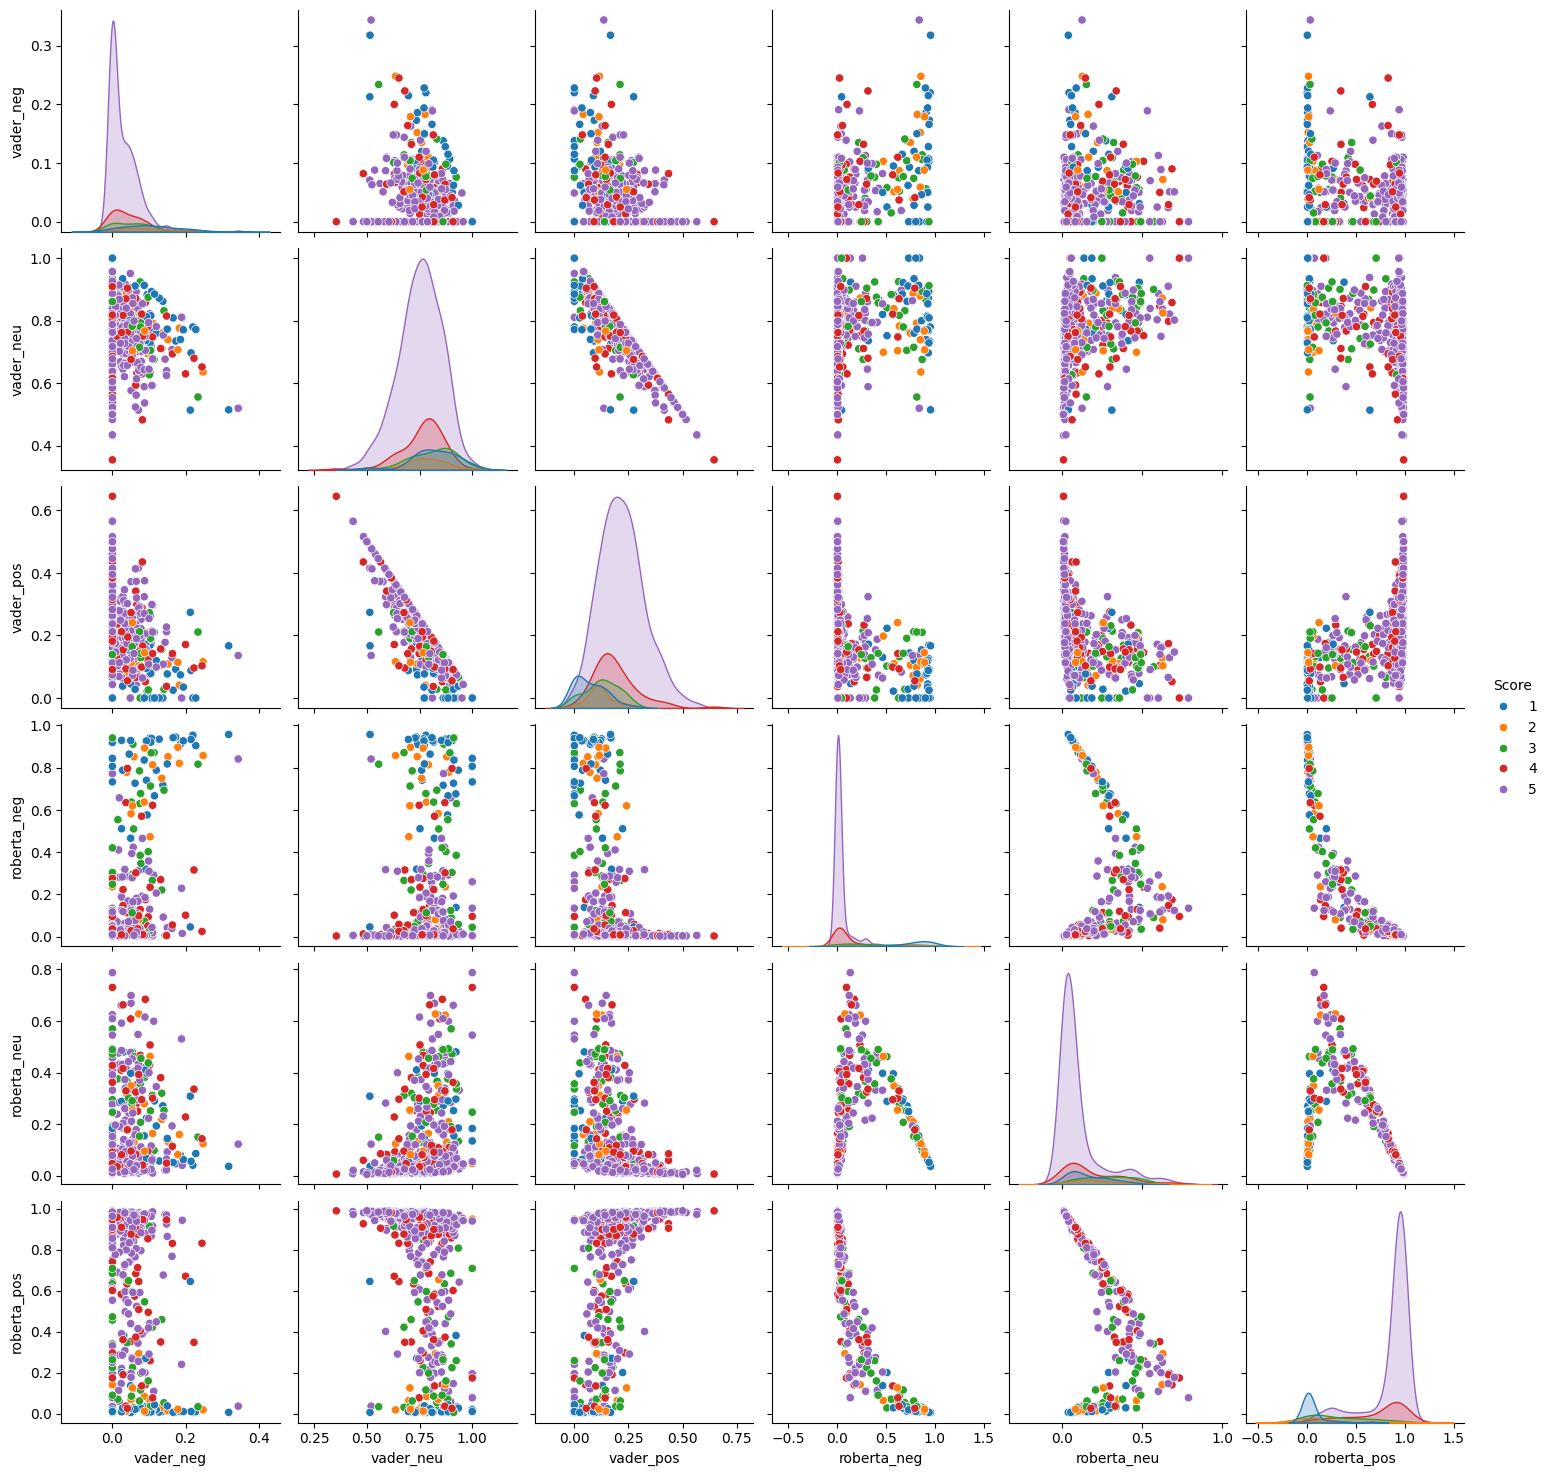

In [26]:
# compare_scores
sns.pairplot(data=results_df,
             vars=['vader_neg','vader_neu','vader_pos',
                   'roberta_neg','roberta_neu','roberta_pos'],
             hue='Score',
             palette='tab10')

In [27]:
#positive semntiment with 1 star review
results_df.query('Score==1').sort_values('roberta_pos',ascending=False)['Text'].iloc[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [28]:
results_df.query('Score==1').sort_values('vader_pos',ascending=False)['Text'].iloc[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [29]:
# negative sentiments with 5 star review
results_df.query('Score==5').sort_values('roberta_neg',ascending=False)['Text'].iloc[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [30]:
# negative sentiments with 5 star review
results_df.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].iloc[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [31]:
from transformers import pipeline

In [32]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [33]:
sent_pipeline('I am so happy')

[{'label': 'POSITIVE', 'score': 0.9998812675476074}]

In [34]:
# summarizing the data

question_answerer = pipeline("question-answering", model='distilbert-base-cased-distilled-squad')


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


In [35]:
# we are summarizing the reveiw
context = example

result = question_answerer(question="review is all about, what?",     context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)},start: {result['start']}, end: {result['end']}")

Answer: 'Quaker Oats', score: 0.1366,start: 60, end: 71


In [36]:
# summarizing the review
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
# summary of the review
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
print(summarizer(ARTICLE, max_length=30, min_length=2, do_sample=False))
# print(summarizer(context, max_length=10, min_length=5, do_sample=False))

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'summary_text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree"'}]
